In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
advertising = pd.DataFrame(pd.read_csv("Downloads/advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

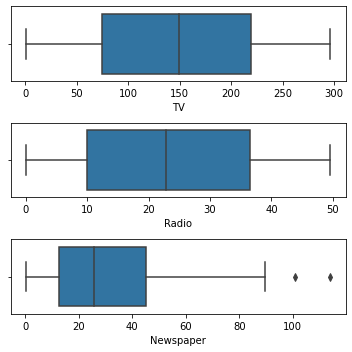

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[1])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[2])
plt.tight_layout()

In [10]:
# There are no considerable outliers present in the data.

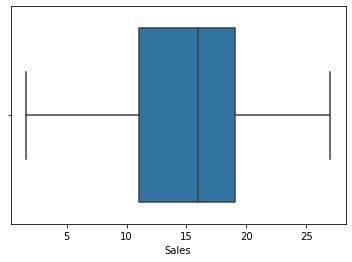

In [11]:
sns.boxplot(advertising['Sales'])
plt.show()

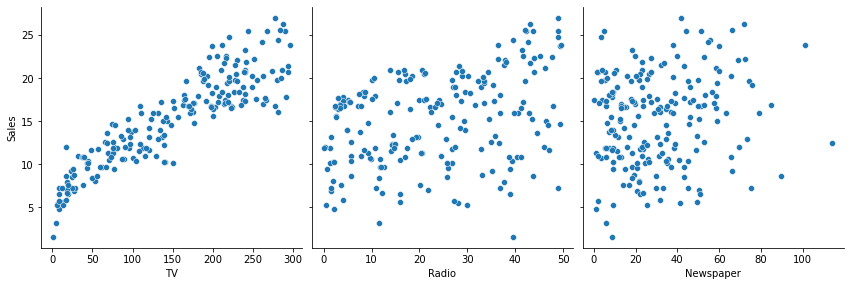

In [13]:
# Relation of Sales with other variables
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

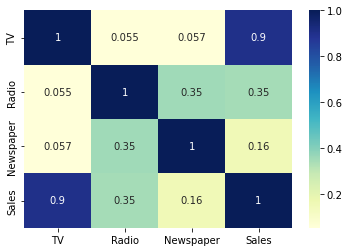

In [14]:
# Correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [15]:
X = advertising['Radio']
y = advertising['Sales']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [18]:
# Train dataset
X_train.head()

74     24.6
3      41.3
185    45.1
26     29.3
90      4.9
Name: Radio, dtype: float64

In [19]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [20]:
import statsmodels.api as sm

In [21]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [22]:
# Printing the intercept and the slope of the regression line
lr.params

const    12.164674
Radio     0.123920
dtype: float64

In [23]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Wed, 27 Dec 2023   Prob (F-statistic):           5.36e-05
Time:                        00:09:20   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.0

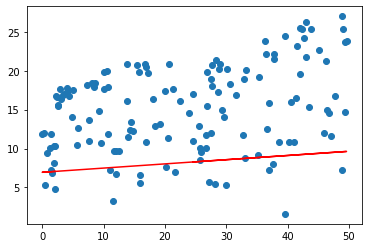

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [25]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

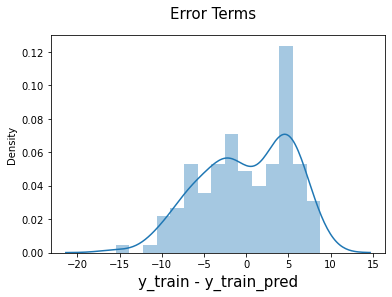

In [26]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

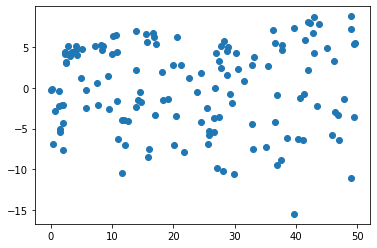

In [27]:
plt.scatter(X_train,res)
plt.show()

In [28]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [29]:
y_pred.head()

126    16.985157
104    16.415126
99     17.332133
92     16.315990
111    16.873629
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
# Square root of returned mean squared error
np.sqrt(mean_squared_error(y_test, y_pred))

4.07311786277614

In [32]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.15413341545839598

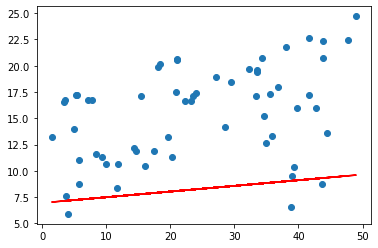

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()